In [1]:
import pandas as pd
import keras as keras
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [ ]:
prefix=''

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cd '/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3' && pwd
prefix= '/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3'


Mounted at /content/drive
/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3


In [32]:
import glob
!git clone https://github.com/javierrca/eegcom.git
ds_path = "/content/eegcom/dataset"
person_code = "01"
base_path = ds_path + "/" + person_code
print('\nNamed with wildcard *:')
paths=[]
for name in glob.glob(base_path+'/*',recursive = True):
  paths.append(name+"/")

print(paths)

!cd paths[0] && ls -l

Cloning into 'eegcom'...
remote: Enumerating objects: 1572, done.
remote: Counting objects: 100% (1572/1572), done.
remote: Compressing objects: 100% (1482/1482), done.
remote: Total 1572 (delta 74), reused 1569 (delta 74), pack-reused 0
Receiving objects: 100% (1572/1572), 10.08 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (74/74), done.

Named with wildcard *:
['/content/eegcom/dataset/01/ses18/', '/content/eegcom/dataset/01/ses06/', '/content/eegcom/dataset/01/ses09/', '/content/eegcom/dataset/01/ses13/', '/content/eegcom/dataset/01/ses04/', '/content/eegcom/dataset/01/ses10/', '/content/eegcom/dataset/01/ses05/', '/content/eegcom/dataset/01/ses12/', '/content/eegcom/dataset/01/ses17/', '/content/eegcom/dataset/01/ses21/', '/content/eegcom/dataset/01/ses20/', '/content/eegcom/dataset/01/ses01/', '/content/eegcom/dataset/01/ses02/', '/content/eegcom/dataset/01/ses07/', '/content/eegcom/dataset/01/ses15/', '/content/eegcom/dataset/01/ses19/', '/content/eegcom/dataset/01/ses16/', '/

In [20]:
! cd /content/eegcom/dataset/01/ses18/ && ls -l

total 300
-rw-r--r-- 1 root root   740 Feb  2 10:39 01_01_EEGPOW_100.csv
-rw-r--r-- 1 root root 66252 Feb  2 10:39 01_01_EEGRAW_101.csv
-rw-r--r-- 1 root root   729 Feb  2 10:39 01_02_EEGPOW_102.csv
-rw-r--r-- 1 root root 59374 Feb  2 10:39 01_02_EEGRAW_103.csv
-rw-r--r-- 1 root root   568 Feb  2 10:39 01_03_EEGPOW_104.csv
-rw-r--r-- 1 root root 42642 Feb  2 10:39 01_03_EEGRAW_105.csv
-rw-r--r-- 1 root root   667 Feb  2 10:39 01_04_EEGPOW_106.csv
-rw-r--r-- 1 root root 41856 Feb  2 10:39 01_04_EEGRAW_107.csv
-rw-r--r-- 1 root root   665 Feb  2 10:39 01_05_EEGPOW_108.csv
-rw-r--r-- 1 root root 60604 Feb  2 10:39 01_05_EEGRAW_109.csv
-rw-r--r-- 1 root root   358 Feb  2 10:39 head.csv


In [69]:
paths = [

           str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses01/"),
               str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses02/"),
             str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses03/") ,
     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses04/") ,
     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses05/") ,
    str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses06/") ,
    str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses07/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test01/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test02/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test03/") ,
    str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_train01/") ,

           str(os.getcwd() +prefix+"/pruebas/test/javier/ses01/"),  #90
              str(os.getcwd() +prefix+"/pruebas/test/javier/ses02/"), #62
           str(os.getcwd() +prefix+"/pruebas/test/javier/ses03/"),
                str(os.getcwd() +prefix+"/pruebas/test/javier/ses04/"),
                  str(os.getcwd() +prefix+"/pruebas/test/javier/ses05/"), #100
                 str(os.getcwd() +prefix+"/pruebas/test/javier/ses06/"),
             str(os.getcwd() +prefix+"/pruebas/test/javier/ses07/"),
            str(os.getcwd() +prefix+"/pruebas/test/javier/ses08/"),      #60
           str(os.getcwd()+prefix +"/pruebas/test/javier/ses09/")   ,
                 str(os.getcwd()+prefix +"/pruebas/test/javier/ses10/")   ,
                str(os.getcwd()+prefix +"/pruebas/test/javier/ses11/")   , #60
                  str(os.getcwd() +prefix+"/pruebas/test/javier/ses12/")   ,



    #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses01/")     ,
    #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses02/")   ,
    #         #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses03/")     ,#pastillas
    #      str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses04/")  ,

    # str(os.getcwd() +prefix+"/pruebas/test/silvia/ses01/")   ,
    # str(os.getcwd() +prefix+"/pruebas/test/silvia/ses02/")      ,
    # str(os.getcwd() +prefix+"/pruebas/test/silvia/ses03/")     ,
    #  str(os.getcwd()+prefix +"/pruebas/test/silvia/ses04/")     , #pastillas
    #     str(os.getcwd()+prefix +"/pruebas/test/silvia/sesbal/")     ,

        ]

In [5]:





def load_data(paths):
    dfRaw = []
    X_raw_train = []
    y_raw_train =[]
    filter=[]
    filterLastRows = 1000
    # filterLastRows = 1050
    # filterLastRows = 750
    #filterLastRows = 512
    i=0
    # print (paths)
    for path in paths:
        print(Path)
        dfHead = pd.read_csv(path + 'head.csv')
        all_raw_files = glob.glob(os.path.join(path , "*EEGRAW*.csv"))
        # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])
        print("weweweww" + all_raw_files)
        for filename in all_raw_files:
            dfRaw = pd.read_csv(filename, index_col=None, header=0)
            # np.array(dfRaw)




            # a = len(dfRaw)
            # print ("filename:"+ filename + " " + str(a))
            if len(dfRaw)>filterLastRows:
                qCode = dfRaw['questionCode'].iloc[[0]][0]
                # print(qCode)
                X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
#ini
                # X_raw_train.append([])
                samples = list()
                # length = 350
                length = 1000
                # length = 350
                #length = 512
                # step over the 5,000 in jumps of 200
                for j in range(0,filterLastRows,length):
                 # grab from i to i + 200
                    sample = X[j:j+length]
                    samples.append(sample)
                # print(len(samples))
                # X=samples

                for ids, X in enumerate(samples):
                    X_raw_train.append([])
#fin
                    for idx, it in enumerate(X):
                        X_raw_train[i].append([])
                        X_raw_train[i][idx].append([])
                        X_raw_train[i][idx][0] = X[idx]

                    y_raw_train.append([])
                    y_raw_train[i].append([])
                    y_raw_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
                    i=i+1

    return X_raw_train,y_raw_train


def get_wavelets_ricken(X):

    # rnd = np.random.RandomState(12345)
    # brain_signal = np.sin(np.linspace(0, 1000, N)) + rnd.uniform(0, 1, N)
    brain_signal =X
    N = len(brain_signal)
    # widths = np.arange(1, N//8)
    widths = np.arange(1, N//8)

    # widths = np.arange(1, 32)
    # widths = 250
    # print(brain_signal.shape)
    cwtmatr = signal.cwt(brain_signal, signal.ricker, widths)
    # signal.morlet(M, w=5.0, s=1.0, complete=True)[source]

    # cwtmatr = signal.cwt(brain_signal, signal.daub(8), widths)
    return cwtmatr

def get_wavelets_morlet2(X):

    # rnd = np.random.RandomState(12345)
    # brain_signal = np.sin(np.linspace(0, 1000, N)) + rnd.uniform(0, 1, N)
    brain_signal =X
    N = len(brain_signal)
    # widths = np.arange(1, N//8)
    widths = np.arange(1, N//8)

    # widths = np.arange(1, 32)
    # widths = 250
    # print(brain_signal.shape)
    w = 6.
    cwtmatr =  signal.cwt(brain_signal, signal.morlet2, widths, w=w)
    # signal.morlet(M, w=5.0, s=1.0, complete=True)[source]

    # cwtmatr = signal.cwt(brain_signal, signal.daub(8), widths)
    return cwtmatr

def load_data_wavelets(paths):
    dfRaw = []
    X_raw_train = []
    y_raw_train =[]
    filter=[]
    filterLastRows = 1000
    # filterLastRows = 1050
    # filterLastRows = 750
    #filterLastRows = 512
    i=0
    # print (paths)
    for path in paths:
        dfHead = pd.read_csv(path + 'head.csv')
        # all_raw_files = glob.glob(os.path.join(path , "*EEGRAW*.csv"))
        all_raw_files = glob.glob(os.path.join(path , "*raw*.csv"))

        # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])

        for filename in all_raw_files:
            dfRaw = pd.read_csv(filename, index_col=None, header=0)
            # np.array(dfRaw)




            # a = len(dfRaw)
            # print ("filename:"+ filename + " " + str(a))
            if len(dfRaw)>filterLastRows:
                qCode = dfRaw['questionCode'].iloc[[0]][0]
                # print(qCode)
                X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
#ini
                # X_raw_train.append([])
                samples = list()
                # length = 350
                length = 1000
                # length = 350
                #length = 512
                # step over the 5,000 in jumps of 200
                for j in range(0,filterLastRows,length):
                 # grab from i to i + 200
                    sample = X[j:j+length]
                    samples.append(sample)
                # print(len(samples))
                # X=samples

                for ids, X in enumerate(samples):
                    X_raw_train.append([])
#fin
                    for idx, it in enumerate(X):
                        X_raw_train[i].append([])
                        X_raw_train[i][idx].append([])
                        X_raw_train[i][idx][0] = X[idx]
                    # print(np.array(X_raw_train[i]).shape)
                    # X_raw_train[i] = get_wavelets_morlet2(np.array(X_raw_train[i]).flatten())
                    X_raw_train[i] = get_wavelets_ricken(np.array(X_raw_train[i]).flatten())
                    # X_raw_train = get_wavelets(X_raw_train.flatten())
                    y_raw_train.append([])
                    y_raw_train[i].append([])
                    y_raw_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
                    i=i+1

    return X_raw_train,y_raw_train

X_raw_train = []



y_raw_train =[]
# X_raw_train,y_raw_train= load_data(paths)
print(paths)
X_raw_train,y_raw_train= load_data_wavelets(paths)
X = np.array(X_raw_train)
y = np.array(y_raw_train)
X.shape, y.shape


['/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3/../FASE1/pruebas/preguntas_01-30/javier/ses03/']


((40, 124, 1000), (40, 1))

In [ ]:
# 3,4,9 funcionan bien
paths_test = [
          #  str(os.getcwd() +prefix+"/pruebas/test/javier/ses01/"),  #90
          #     str(os.getcwd() +prefix+"/pruebas/test/javier/ses02/"), #62
          #  str(os.getcwd() +prefix+"/pruebas/test/javier/ses03/"),
          #       str(os.getcwd() +prefix+"/pruebas/test/javier/ses04/"),
          #         str(os.getcwd() +prefix+"/pruebas/test/javier/ses05/"), #100
          #        str(os.getcwd() +prefix+"/pruebas/test/javier/ses06/"),
          #    str(os.getcwd() +prefix+"/pruebas/test/javier/ses07/"),
          #   str(os.getcwd() +prefix+"/pruebas/test/javier/ses08/"),      #60
          #  str(os.getcwd()+prefix +"/pruebas/test/javier/ses09/")   ,
          #        str(os.getcwd()+prefix +"/pruebas/test/javier/ses10/")   ,
          #       str(os.getcwd()+prefix +"/pruebas/test/javier/ses11/")   , #60
          #         str(os.getcwd() +prefix+"/pruebas/test/javier/ses12/")   ,


    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses01/")   ,
    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses02/")      ,
    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses03/")     ,
     str(os.getcwd()+prefix +"/pruebas/test/silvia/ses04/")     ,
        str(os.getcwd()+prefix +"/pruebas/test/silvia/sesbal/")     ,
]


x_test_raw, y_test_raw = load_data_wavelets(paths_test)

x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)
x_test.shape

(36, 124, 1000)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_accuraccy(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    a = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
    b = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
    acc = (a + b)/2
    print ("calc accuracy : " + str(acc))
    return acc

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    plt.figure(figsize=(2,2))
    labels = ['0: No', '1: Si']
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(conf_matrix)
    print(classification_report(y_test,pred_y))
    return


In [ ]:
X.shape, y.shape

((142, 124, 1000), (142, 1))

In [72]:

#Split twice to get the validation set
# X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=123, stratify=y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=234) # 0.25 x 0.8 = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
#Print the shapes
# X_train.shape,  y_train.shape, X_test.shape, X_val.shape, y_val.shape, len(y_train), len(y_test), len(y_val)

y_val_cat =keras.utils.to_categorical(y_val,2)
y_train_cat =keras.utils.to_categorical(y_train,2)
y_test_cat =keras.utils.to_categorical(y_test,2)

# X_train.shape,  y_train.shape, X_val.shape, y_val.shape, len(y_train),  y_val_cat
# y_val_cat, y_val, y_train, y_train_cat

# y_train_all
X_train.shape, y_train.shape,X_test.shape,y_test.shape,X_val.shape, y_val.shape

((135, 124, 1000),
 (135, 1),
 (45, 124, 1000),
 (45, 1),
 (45, 124, 1000),
 (45, 1))

In [ ]:
# y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
# model = keras.models.load_model('model_javier_raw_02.keras')
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
# show_results(y_test,y_test_pred2)

# brain_signal1 = np.sin(np.linspace(0, 1000, N)) + rnd.uniform(0, 1, N)
# brain_signal = X_train[0].flatten()
# print(np.sin(np.linspace(0, 1000, N)).shape)
# print(brain_signal.shape)
# print(brain_signal1)
X.shape

(142, 124, 1000)

In [ ]:
# y

[0]
(124, 1000)


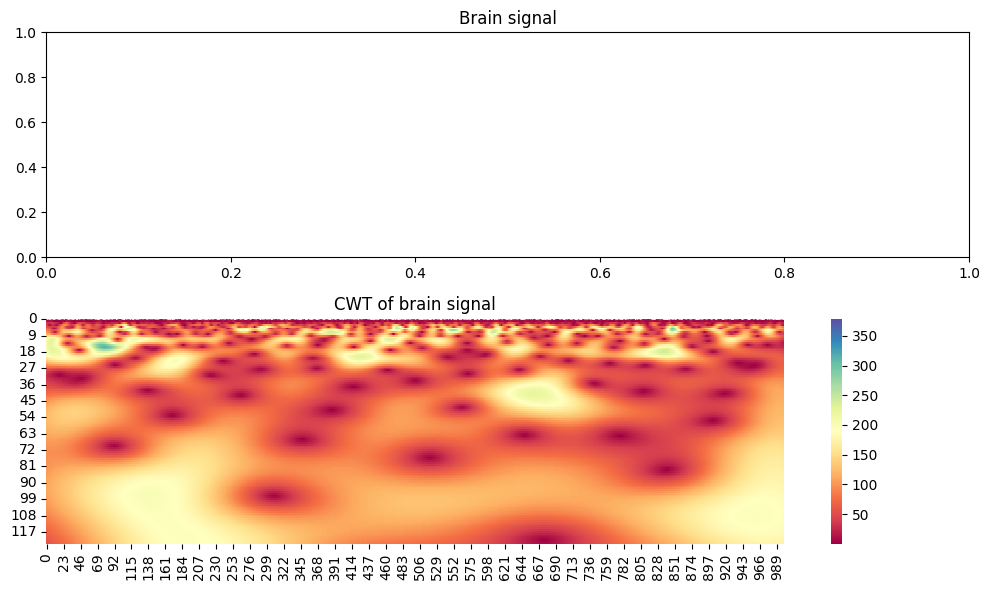

In [ ]:
#ricken
N = 1000
# wvl_x = X[0].flatten()
# cwtmatr = get_wavelets(wvl_x)
i =1

print(y[i])
cwtmatr = X[i]
print(cwtmatr.shape)
# print(cwtmatr)
# print(np.abs(cwtmatr))
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
axes = ax.flatten()

# sns.lineplot(np.linspace(0, 1000, N), wvl_x, ax=axes[0], lw=2)
# sns.heatmap(cwtmatr, cmap='Spectral', ax=axes[1]);
sns.heatmap( np.abs(cwtmatr), cmap='Spectral', ax=axes[1]);

axes[0].set_title('Brain signal')
axes[1].set_title('CWT of brain signal')

plt.tight_layout()



In [ ]:

# #Split twice to get the validation set
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

# y_val_cat = y_train_cat =keras.utils.to_categorical(y_val,2)
# y_train_cat =keras.utils.to_categorical(y_train,2)


# X_train.shape,  y_train.shape, X_val.shape, y_val.shape, len(y_train),  len(y_val)
# #
# y_val_cat

In [ ]:
#CONSERVAR 68 EN TEST
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2],1)
print(input_shape)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(keras.layers.Conv2D(120, kernel_size=(2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.4))
# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()

(124, 1000, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 999, 32)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 998, 48)      6192      
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 997, 120)     23160     
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 499, 120)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 61, 499, 120)      0         
                                                                 
 flatten (Flatten)           (None, 3652680)           0         
                                         

In [73]:
#model-2

from keras.layers import Conv2D, LeakyReLU

keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2],1)
print(input_shape)

model = keras.Sequential()

# LeakyReLU()
# model.add(keras.layers.Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation=LeakyReLU(), input_shape=(input_shape)))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation=LeakyReLU()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
# model.add(keras.layers.Conv2D(16, kernel_size=(2, 2), activation=LeakyReLU()))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.25))

# model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation=LeakyReLU()))
model.add(keras.layers.Dropout(0.2))

# model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation=LeakyReLU()))
model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Flatten())

# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
opt = keras.optimizers.Adam()
# opt = keras.optimizers.Adam(learning_rate=0.01)
# opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()


(124, 1000, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 998, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 122, 998, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 499, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 497, 32)       4640      
                                                                 
 batch_normalization_1 (Bat  (None, 59, 497, 32)       128       
 chNormalization)                                                
                                         

In [ ]:
#model-3

from keras.layers import Conv2D, LeakyReLU

keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2],1)
print(input_shape)

model = keras.Sequential()

# LeakyReLU()
# model.add(keras.layers.Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), activation=LeakyReLU(), input_shape=(input_shape)))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), activation=LeakyReLU()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(input_shape)))
# model.add(keras.layers.Conv2D(16, kernel_size=(2, 2), activation=LeakyReLU()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.25))

# model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation=LeakyReLU()))
model.add(keras.layers.Dropout(0.2))

# model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation=LeakyReLU()))
model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Flatten())

# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
opt = keras.optimizers.Adam()
# opt = keras.optimizers.Adam(learning_rate=0.01)
# opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()

(124, 1000, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 996, 16)      416       
                                                                 
 batch_normalization (Batch  (None, 120, 996, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 498, 16)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 498, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 494, 32)       12832     
                                                                 
 batch_normalization_1 (Bat  (None, 56, 4

Epoch 1/50
5/5 [==============================] - 1s 169ms/step - loss: 1.1370 - accuracy: 0.9630 - val_loss: 90.8734 - val_accuracy: 0.5778
Epoch 2/50
5/5 [==============================] - 1s 143ms/step - loss: 4.5718e-06 - accuracy: 1.0000 - val_loss: 96.1287 - val_accuracy: 0.5111
Epoch 3/50
5/5 [==============================] - 1s 142ms/step - loss: 1.1230 - accuracy: 0.9852 - val_loss: 99.2485 - val_accuracy: 0.5111
Epoch 4/50
5/5 [==============================] - 1s 144ms/step - loss: 0.0374 - accuracy: 0.9926 - val_loss: 100.6570 - val_accuracy: 0.4667
Epoch 5/50
5/5 [==============================] - 1s 144ms/step - loss: 0.9940 - accuracy: 0.9704 - val_loss: 96.8660 - val_accuracy: 0.4889
Epoch 6/50
5/5 [==============================] - 1s 143ms/step - loss: 1.1461 - accuracy: 0.9630 - val_loss: 112.2340 - val_accuracy: 0.5111
Epoch 7/50
5/5 [==============================] - 1s 147ms/step - loss: 0.6602 - accuracy: 0.9704 - val_loss: 138.2453 - val_accuracy: 0.4889
Epoch 

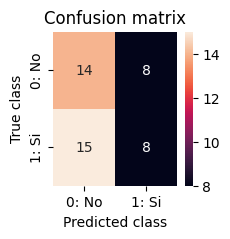

[[14  8]
 [15  8]]
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        22
           1       0.50      0.35      0.41        23

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.49      0.49      0.48        45



In [81]:

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.78 ):
        # if( logs.get('accuracy')> 0.87 ):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks2 =myCallback()


history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks2])
# history = model.fit(X_train, y_train_cat, epochs=50, batch_size=64, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks2])
# history = model.fit(X_train, y_train_cat, epochs=50, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks2])
# validation_split:0.2
# history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, shuffle=True, callbacks=[callbacks2])


y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
y_val2=  [np.argmax(i) for i in y_val_cat]
# show_results(y_val,y_pred2)


# x_test = np.array(x_test_raw)
# y_test = np.array(y_test_raw)

y_test_pred = model.predict(X_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)3d

1/1 [==============================] - 0s 27ms/step


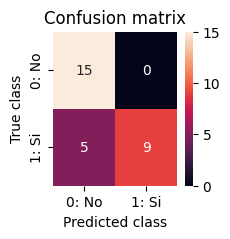

[[15  0]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.64      0.78        14

    accuracy                           0.83        29
   macro avg       0.88      0.82      0.82        29
weighted avg       0.87      0.83      0.82        29



In [ ]:

y_test_pred = model.predict(X_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [3]:
file = str(os.getcwd() +prefix+ '/model_javier_raw_wavelet_03_alltest63.keras')
# new_model = tf.keras.models.load_model('model_javier_raw_wavelet_03_alltest63.keras', compile=False)
new_model = tf.keras.models.load_model(file, compile=False)

4/4 [==============================] - 0s 146ms/step


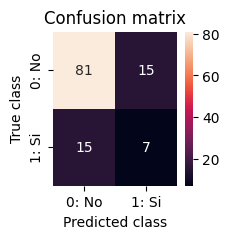

[[81 15]
 [15  7]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        96
           1       0.32      0.32      0.32        22

    accuracy                           0.75       118
   macro avg       0.58      0.58      0.58       118
weighted avg       0.75      0.75      0.75       118

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 998, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 122, 998, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 499, 16)       0         
 D)                                                              
                                        

In [9]:
# from keras.utils.vis_utils import plot_model

paths = [

           str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses01/remove_some_negative/"),
                      str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses03/remove_some_negative/"),
str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses04/remove_some_negative/"),
           str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses05/remove_some_negative/"),
str(os.getcwd() +prefix +"/../FASE1/pruebas/preguntas_01-30/javier/ses01/"),
str(os.getcwd() +prefix +"/../FASE1/pruebas/preguntas_01-30/javier/ses02/"),
 str(os.getcwd() +prefix +"/../FASE1/pruebas/preguntas_01-30/javier/ses03/"),

		]


X_raw_mytest,y_raw_mytest= load_data_wavelets(paths)
X_mytest = np.array(X_raw_mytest)
y_mytest = np.array(y_raw_mytest)


y_test_pred = new_model.predict(X_mytest)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_mytest,y_test_pred2)
# X_test
new_model.summary()

# plot_model(new_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# model.save('model_silvia_raw_wavelet_05_morlet2_mixalltraintest_remove_pastillas_66.keras')
# model.save('model_javier_raw_wavelet_04_model2_mixallalltest69.keras')


In [ ]:
!pwd

/content


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import backend as K
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import (
#     Input,
#     Conv2D,
#     Concatenate,
#     Dense,
#     Lambda,
#     BatchNormalization,
#     GlobalAveragePooling2D,
#     Activation,
# )
# from tensorflow.keras.models import Model
# from wavetf import WaveTFFactory


# def wavelet_cnn(
#     input_shape,
#     ks=3,
#     baselev=4,
#     wavelet=True,
#     wave_kern="db2",
#     hsv=True,
#     convrep=2,
#     num_classes=2,
# ):
#     inputs = Input(input_shape)
#     chans = input_shape[2]  # number of channels, e.g., 3 if RGB
#     bl = baselev

#     # wavelet computation
#     if wavelet:
#         # convert RGB to HSV?
#         if hsv:
#             wave0 = Lambda(lambda x: tf.image.rgb_to_hsv(x))(inputs)
#         else:
#             wave0 = inputs
#         # compute 4 level of wavelet
#         wave1 = WaveTFFactory.build(wave_kern)(wave0)
#         # compute new wavelet features from LL componenents
#         wave2 = WaveTFFactory.build(wave_kern)(wave1[:, :, :, :chans])
#         wave3 = WaveTFFactory.build(wave_kern)(wave2[:, :, :, :chans])
#         wave4 = WaveTFFactory.build(wave_kern)(wave3[:, :, :, :chans])
#         # normalize
#         waves = [wave1, wave2, wave3, wave4]
#         for l in waves:
#             l = BatchNormalization()(l)
#     else:
#         wave1 = wave2 = wave3 = wave4 = None

#     kinit = "glorot_normal"  # 'he_normal'

#     def rep_conv(cnn, scale=1):
#         for i in range(convrep):
#             cnn = Conv2D(
#                 scale * bl,
#                 ks,
#                 activation="relu",
#                 padding="same",
#                 kernel_initializer=kinit,
#             )(cnn)
#         return cnn

#     def pool_down(cnn, mul):
#         cnn = Conv2D(
#             mul * bl,
#             ks,
#             activation="relu",
#             padding="same",
#             kernel_initializer=kinit,
#             strides=(2, 2),
#         )(cnn)
#         return cnn

#     cnn = inputs
#     cnn = rep_conv(cnn, 1)

#     for l in range(4):
#         cnn = pool_down(cnn, 2 ** (l + 1))
#         cnn = rep_conv(cnn, 2 ** (l + 1))
#         if wavelet:
#             cnn = Concatenate(axis=3)([cnn, waves[l]])

#     # output
#     cnn = Conv2D(2048, ks)(cnn)
#     cnn = Activation("relu")(cnn)
#     cnn = GlobalAveragePooling2D()(cnn)
#     outputs = Dense(num_classes, activation="softmax")(cnn)
#     model = Model(inputs=inputs, outputs=outputs)
#     return model


# # model = wavelet_cnn([128, 128, 3])

# input_shape=(X_train.shape[1],X_train.shape[2],1)
# print(input_shape)

# model = wavelet_cnn(input_shape)

# print(model.summary())

# # net2 = wavelet_cnn([128, 128, 3], wave_kern="haar")
# # print(net2.summary())

# history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks3])


# y_pred = model.predict(X_val)
# y_pred2 = [np.argmax(i) for i in y_pred]
# y_val2=  [np.argmax(i) for i in y_val_cat]
# # show_results(y_val,y_pred2)


# x_test = np.array(x_test_raw)
# y_test = np.array(y_test_raw)
# y_test_pred = model.predict(x_test)
# y_test_pred2 = [np.argmax(i) for i in y_test_pred]
# show_results(y_test,y_test_pred2)


(1000, 1, 1)


ValueError: Exception encountered when calling layer "lambda" (type Lambda).

Dimension must be 3 but is 1 for '{{node lambda/RGBToHSV}} = RGBToHSV[T=DT_FLOAT](Placeholder)' with input shapes: [?,1000,1,1].

Call arguments received by layer "lambda" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 1000, 1, 1), dtype=float32)
  • mask=None
  • training=None